<a href="https://colab.research.google.com/github/Desmond-Tiny/deep-learning-stock-prediction/blob/main/Microsoft_stock_levels_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t=np.arange(0,1500)
x=np.sin(0.02*t)+np.random.rand(1500)*2


In [ ]:
x

array([ 1.24981582,  1.82180731,  0.80544013, ...,  0.46579651,
       -0.21959284,  0.51555024])

In [ ]:
train,test = x[0:1000],x[1000:]

In [ ]:
def convert_data_extra(data,x_step,y_step):
  X,Y = [],[]
  for i in range(len(data)-x_step-y_step+1):
    d=i+x_step

    X.append(data[i:d])
    Y.append(data[d:d+y_step])

  return np.array(X),np.array(Y)

x_step=6
y_step=1
trainX,trainY=convert_data_extra(train,x_step,y_step)
testX,testY=convert_data_extra(test,x_step,y_step)

trainX[1],testX[1]






(array([1.82180731, 0.80544013, 0.4569233 , 1.2548354 , 1.55448797,
        1.62835822]),
 array([2.83382844, 2.04858122, 1.24836698, 2.8822737 , 1.71513431,
        2.66454294]))

In [ ]:
trainX.shape,testX.shape

((994, 6), (494, 6))

In [ ]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

trainX.shape,testX.shape





((994, 6, 1), (494, 6, 1))

In [ ]:
trainY.shape

(994, 1)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

ms=yf.download('MSFT',start='2012-01-01',end='2023-12-31',progress=False)


In [ ]:
ms.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2012-01-03,21.039204,21.188528,20.740551,20.866299,64731500
2012-01-04,21.534336,21.589351,21.047064,21.078500,80516100
2012-01-05,21.754395,21.793690,21.447884,21.518616,56081400
2012-01-06,22.092346,22.155220,21.636510,21.636510,99455500
2012-01-09,21.801558,22.084491,21.785839,22.045194,59706800


In [ ]:
ms[:"2021"].Close.values.reshape(-1,1).shape

(2517, 1)

In [ ]:
train=ms[:"2021"].Close.values.reshape(-1,1)
test=ms["2022":].Close.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [ ]:
x_step=10
y_step=1

In [ ]:
def convert_data_extra(data,x_step,y_step):
  X,Y = [],[]
  for i in range(len(data)-x_step-y_step+1):
    d=i+x_step

    X.append(data[i:d])
    Y.append(data[d:d+y_step])

  return np.array(X),np.array(Y)

x_step=10
y_step=1
trainX,trainY=convert_data_extra(train,x_step,y_step)
testX,testY=convert_data_extra(test,x_step,y_step)


trainX.shape,testX.shape



((2507, 10, 1), (491, 10, 1))

In [ ]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

trainX.shape,testX.shape


((2507, 10, 1), (491, 10, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN


model = Sequential()
model.add(SimpleRNN(units=64,activation='tanh',input_shape=(None,1),return_sequences=True))
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

history = model.fit(trainX,trainY,epochs=100,batch_size=16)


score=model.evaluate(trainX,trainY)
print('train score',score)
score=model.evaluate(testX,testY)
print('test score',score)



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0400
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0010
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4545e-04
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6794e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8570e-04
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8212e-04
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7767e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6982e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5682e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1155e-04
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5676e-04
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1815e-04
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4000e-04
Epoch 

In [ ]:
trainX.shape,testX.shape

((2507, 10, 1), (491, 10, 1))

In [ ]:
train_preds=model.predict(trainX)
test_preds=model.predict(testX)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
predicted=np.concatenate((train_preds,test_preds),axis=0)

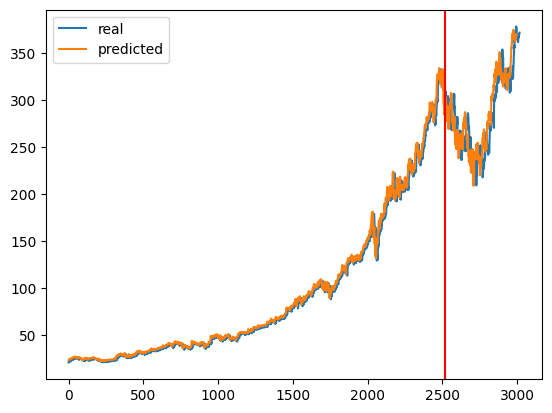

In [ ]:
plt.plot(ms.Close.values,label='real')
plt.plot(scaler.inverse_transform(predicted),label='predicted')
plt.axvline(x=len(train),c='r')
plt.legend()
plt.show()

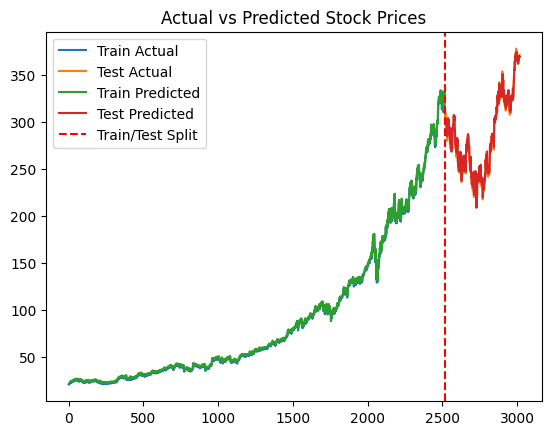

In [ ]:
train_len = len(train)
test_len = len(test)
train_preds_len = len(train_preds)
test_preds_len = len(test_preds)

plt.plot(range(train_len), scaler.inverse_transform(train), label='Train Actual')
plt.plot(range(train_len, train_len + test_len), scaler.inverse_transform(test), label='Test Actual')

# Predicted lines (start later due to x_step windowing)
plt.plot(range(x_step, x_step + train_preds_len), scaler.inverse_transform(train_preds), label='Train Predicted')
plt.plot(range(train_len + x_step, train_len + x_step + test_preds_len), scaler.inverse_transform(test_preds), label='Test Predicted')

plt.axvline(x=train_len, c='r', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()



In [ ]:
# train this with y_step=2 *

In [ ]:
preds=model.predict(testX)
preds.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(491, 1)